In [263]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import matplotlib.pyplot as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math

# Collect the Stock Data

In [264]:
df = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/intc.us.txt", sep=',')
df = df[df['Date']>'1990-01-01']
df

,Date,Open,High,Low,Close,Volume,OpenInt
4534,1990-01-02,0.8579,0.8982,0.8499,0.8982,79600273,0
4535,1990-01-03,0.8982,0.9061,0.8740,0.8740,86671242,0
4536,1990-01-04,0.8820,0.8982,0.8579,0.8904,72928342,0
4537,1990-01-05,0.8904,0.8982,0.8820,0.8820,46184758,0
4538,1990-01-08,0.8904,0.9061,0.8820,0.8982,54001929,0
...,...,...,...,...,...,...,...
11551,2017-11-06,46.6000,46.7400,46.0900,46.7000,34006271,0
11552,2017-11-07,46.7000,47.0900,46.6400,46.7800,24422113,0
11553,2017-11-08,46.6200,46.7000,46.2800,46.7000,21556947,0
11554,2017-11-09,46.0500,46.3900,45.6500,46.3000,25564257,0


In [265]:
df2 = df.reset_index()['Close']
df2.head()

0    0.8982
1    0.8740
2    0.8904
3    0.8820
4    0.8982
Name: Close, dtype: float64

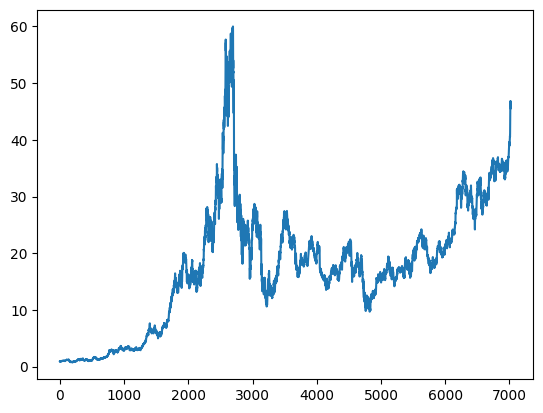

In [266]:
plt.plot(df2)
plt.show()

In [267]:
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1, 1))
print(df2)

[[0.00284151]
 [0.00243317]
 [0.0027099 ]
 ...
 [0.77568245]
 [0.76893302]
 [0.75678403]]


# Preprocessing data with Train and Test

In [268]:
train_dataset_size = int(len(df2) * 0.70)
test_dataset_size = int(len(df2) - train_dataset_size)
train_data, test_data = df2[0:train_dataset_size], df2[train_dataset_size: len(df2)]

In [269]:
## Convert an arrary of values in dataset matrix
def Create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i: (i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[ i + time_step , 0])
    return np.array(dataX), np.array(dataY)

In [270]:
## Reshape into X=t, t+1, t+2, t+3 and Y = t+4
time_step = 100
X_train, y_train = Create_dataset(train_data, time_step)
X_test, y_test = Create_dataset(test_data, time_step)

In [271]:
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4814, 100)
(4814,)
(2006, 100)
(2006,)


# Create an Stacked LSTM Model

In [272]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(4814, 100, 1)
(2006, 100, 1)


In [273]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_34 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_35 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [274]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
76/76 [==============================] - 8s 43ms/step - loss: 0.0052 - val_loss: 4.8790e-04
Epoch 2/100
76/76 [==============================] - 1s 15ms/step - loss: 7.3947e-04 - val_loss: 3.5042e-04
Epoch 3/100
76/76 [==============================] - 1s 15ms/step - loss: 6.4080e-04 - val_loss: 7.2488e-04
Epoch 4/100
76/76 [==============================] - 1s 15ms/step - loss: 6.3506e-04 - val_loss: 2.2233e-04
Epoch 5/100
76/76 [==============================] - 1s 15ms/step - loss: 4.7666e-04 - val_loss: 2.6913e-04
Epoch 6/100
76/76 [==============================] - 1s 15ms/step - loss: 4.4096e-04 - val_loss: 2.1379e-04
Epoch 7/100
76/76 [==============================] - 1s 17ms/step - loss: 4.1454e-04 - val_loss: 5.3336e-04
Epoch 8/100
76/76 [==============================] - 1s 15ms/step - loss: 4.5976e-04 - val_loss: 2.7764e-04
Epoch 9/100
76/76 [==============================] - 1s 15ms/step - loss: 3.6800e-04 - val_loss: 1.6244e-04
Epoch 10/100
76/76 [============

In [275]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [276]:
## Lets do prediction and check performance matrix.
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

## Transform to original form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

63/63 [==============================] - 0s 5ms/step


# Predict the test data and plot the output

In [277]:
## Calculate RMSE for Performance Metrics
math.sqrt(mean_squared_error(y_train, train_predict))

18.09817349931873

In [278]:
## Test data for RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

25.182210762171533

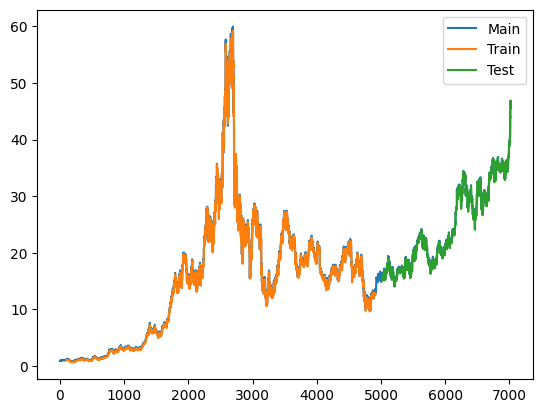

In [279]:
## Plotting 
## Shift Train prediction for plotting
look_back = 100
train_predict_plot = np.empty_like(df2)
train_predict_plot[:,:] = np.nan 
train_predict_plot[look_back: len(train_predict)+look_back, : ] = train_predict

## Shifting Test Prediction for Plotting 
test_predict_plot = np.empty_like(df2)
test_predict_plot[:, :] = np.nan 
test_predict_plot[len(train_predict)+ (look_back*2)+1 : len(df2)-1, :] = test_predict

## Plot Baseline and Prediction
plt.plot(scaler.inverse_transform(df2), label="Main")
plt.plot(train_predict_plot, label="Train")
plt.plot(test_predict_plot, label="Test")
plt.legend()
plt.show()

# Predict the future 30 days and plot the output

In [280]:
len(test_data)

2107

In [281]:
x_input = test_data[len(test_data)-100 : ].reshape(1, -1)
x_input.shape

(1, 100)

In [282]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.559835448719463,
 0.5570006850678825,
 0.5550096010745104,
 0.5480070599113799,
 0.5571694209995242,
 0.5461847118496495,
 0.549508809702991,
 0.5448348243965159,
 0.5594979768561795,
 0.5476695880480964,
 0.5518373655596464,
 0.547922691945559,
 0.5525123092862132,
 0.5580131006577326,
 0.5578443647260909,
 0.5651506305661765,
 0.5616746703743576,
 0.5626702123710435,
 0.5631595465728044,
 0.5663317820876684,
 0.5659943102243851,
 0.5621640045761184,
 0.564998768227699,
 0.5663317820876684,
 0.5699933518042932,
 0.5756628791074543,
 0.5783289068273932,
 0.5929751856938927,
 0.5978010333388454,
 0.5998089909253815,
 0.5966198818173535,
 0.5988134489286956,
 0.5984759770654121,
 0.6014963502417986,
 0.5939369805042505,
 0.5894148575362529,
 0.5972948255439202,
 0.5915915510544308,
 0.5884024419464027,
 0.5776708366939907,
 0.5749879353808875,
 0.5734861855892764,
 0.5689471890281148,
 0.5691159249597564,
 0.569959604617965,
 0.5692846608913982,
 0.5687784530964731,
 0.570297076481248

In [283]:
lst_output = []
n_steps = 100
i = 0

while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print(f"{i} day input {x_input}")
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(f"{i} day output {yhat}")
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

[0.75903887]
101
1 day input [0.55700069 0.5550096  0.54800706 0.55716942 0.54618471 0.54950881
 0.54483482 0.55949798 0.54766959 0.55183737 0.54792269 0.55251231
 0.5580131  0.55784436 0.56515063 0.56167467 0.56267021 0.56315955
 0.56633178 0.56599431 0.562164   0.56499877 0.56633178 0.56999335
 0.57566288 0.57832891 0.59297519 0.59780103 0.59980899 0.59661988
 0.59881345 0.59847598 0.60149635 0.59393698 0.58941486 0.59729483
 0.59159155 0.58840244 0.57767084 0.57498794 0.57348619 0.56894719
 0.56911592 0.5699596  0.56928466 0.56877845 0.57029708 0.57297998
 0.57600035 0.57633782 0.57515667 0.58757564 0.58388032 0.57783957
 0.58774437 0.59311017 0.59712609 0.59964025 0.6083639  0.6083639
 0.61222796 0.60954505 0.61172175 0.61138428 0.6110468  0.61626074
 0.61742502 0.62230149 0.62648614 0.64308976 0.6483037  0.64762875
 0.65081786 0.65248835 0.6563524  0.65282582 0.64695381 0.64511459
 0.65316329 0.65466504 0.65517125 0.66288248 0.66019958 0.66590286
 0.67261855 0.6746265  0.67177487 

In [284]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
len(df2)

7022

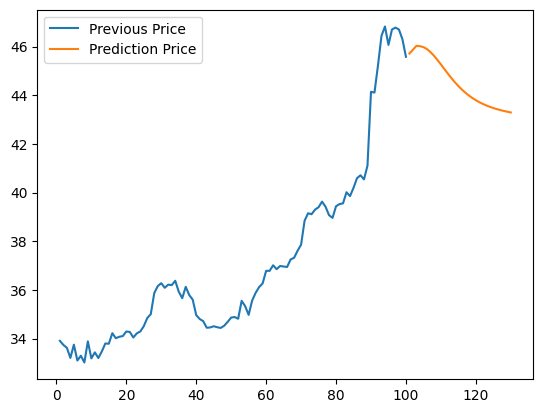

In [285]:
plt.plot(day_new, scaler.inverse_transform(df2[len(df2)-100:]), label="Previous Price")
plt.plot(day_pred, scaler.inverse_transform(lst_output), label="Prediction Price")
plt.legend(loc="upper left")
plt.show()